In [2]:
import pandas as pd 

import numpy as np 
import seaborn as sns

import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("/Users/alteafogh/Documents/ITU/AFAE/AFAE_Pokemon/pokemon_team_rocket_dataset.csv")

In [ ]:
data = data.drop("Rare Item Holder", axis=1)
data = data.drop("Number of Migrations", axis=1)
data= data.drop("Is Pokemon Champion", axis=1)
data = data.drop("PokéBall Usage", axis = 1)
data = data.drop("ID", axis=1)


KeyError: "['Number of Migrations'] not found in axis"

In [ ]:
data = data.drop("Most Used Pokemon Type", axis = 1)
data = data.drop("Battle Strategy",axis = 1)


KeyError: "['Most Used Pokemon Type'] not found in axis"

In [28]:
data = data.drop("Number of Gym Badges", axis=1)

In [16]:
data

,Age,City,Economic Status,Profession,Most Used Pokemon Type,Average Pokemon Level,Criminal Record,Win Ratio,Number of Gym Badges,Battle Strategy,Debt to Kanto,Charity Participation,Team Rocket
0,27,Pewter City,Middle,Fisherman,Rock,50,0,51,1,Unpredictable,24511,True,No
1,55,Viridian City,Middle,PokéMart Seller,Grass,35,1,53,2,Unpredictable,177516,True,Yes
2,14,Pallet Town,High,Police Officer,Poison,96,0,76,5,Aggressive,85695,True,No
3,41,Cerulean City,Middle,Gym Leader Assistant,Dragon,23,0,27,0,Defensive,39739,True,No
4,15,Pallet Town,Middle,Gym Leader Assistant,Ground,16,1,51,1,Aggressive,126923,False,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,36,Viridian City,Middle,Researcher,Rock,91,0,53,5,Defensive,70192,True,NaN
4996,17,Vermilion City,Middle,Gym Leader Assistant,Dragon,23,0,40,0,Defensive,43208,True,NaN
4997,67,Fuchsia City,High,Elite Trainer,Dark,13,0,36,0,Defensive,47794,True,NaN
4998,43,Viridian City,Middle,Daycare Worker,Poison,48,0,51,4,Defensive,10995,True,NaN


In [20]:
# Fill missing values in "Team Rocket" with random choices
data['Team Rocket'] = data['Team Rocket'].fillna(
    pd.Series(np.random.choice(['Yes', 'No'], size=data['Team Rocket'].isna().sum()), 
              index=data[data['Team Rocket'].isna()].index)
)

In [21]:
data["Team Rocket"].value_counts()

No     3804
Yes    1196
Name: Team Rocket, dtype: int64

In [29]:
data.to_csv("pokemon_data.csv")

In [ ]:
print(data["Economic Status"].value_counts())
print("could be an analys of how the different factors influence the economic status (maybe only low and middle)\n")
print(data["City"].value_counts())
print("having some sort of north/ south division")
print(data["Criminal Record"].value_counts())
print("a contributing factor")
print(data["Is Pokemon Champion"].value_counts())
print("contributing factor")
print(data["Profession"].value_counts())
print("pretty evenly distributed, so another contributing factor")
print(data["Most Used Pokemon Type"].value_counts())


Middle    2448
Low       1797
High       755
Name: Economic Status, dtype: int64
could be an analys of how the different factors influence the economic status (maybe only low and middle)

Vermilion City     549
Pallet Town        527
Cerulean City      522
Lavender Town      512
Fuchsia City       511
Saffron City       502
Viridian City      485
Celadon City       475
Pewter City        474
Cinnabar Island    443
Name: City, dtype: int64
having some sort of north/ south division
0    4585
1     415
Name: Criminal Record, dtype: int64
a contributing factor
False    4913
True       87
Name: Is Pokemon Champion, dtype: int64
contributing factor
Breeder                 343
Biker                   334
PokéMart Seller         326
Scientist               323
Casino Worker           320
Police Officer          316
Elite Trainer           316
Champion                316
Gym Leader Assistant    314
Daycare Worker          310
Nurse                   307
Underground Battler     305
Rocket Grunt 

In [ ]:

data_train = data[data['Team Rocket'].notnull()].copy()



(4000, 13)

Distribución de la variable objetivo 'Team Rocket':
No     0.82
Yes    0.18
Name: Team Rocket, dtype: float64


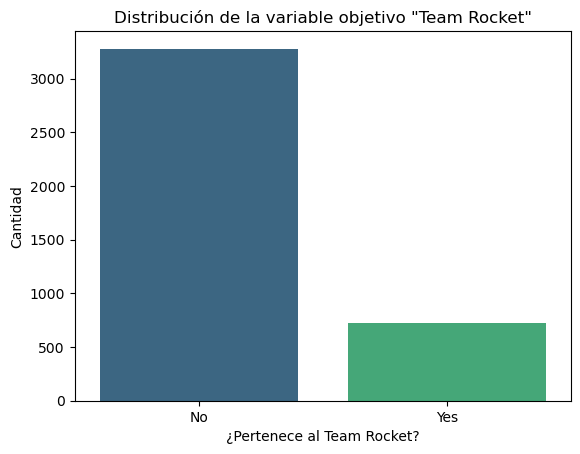

In [10]:
print("Distribución de la variable objetivo 'Team Rocket':")
print(data_train['Team Rocket'].value_counts(normalize=True))

# Visualizo rápidamente esta distribución
sns.countplot(x='Team Rocket', data=data_train, palette='viridis')
plt.title('Distribución de la variable objetivo "Team Rocket"')
plt.ylabel('Cantidad')
plt.xlabel('¿Pertenece al Team Rocket?')
plt.show()

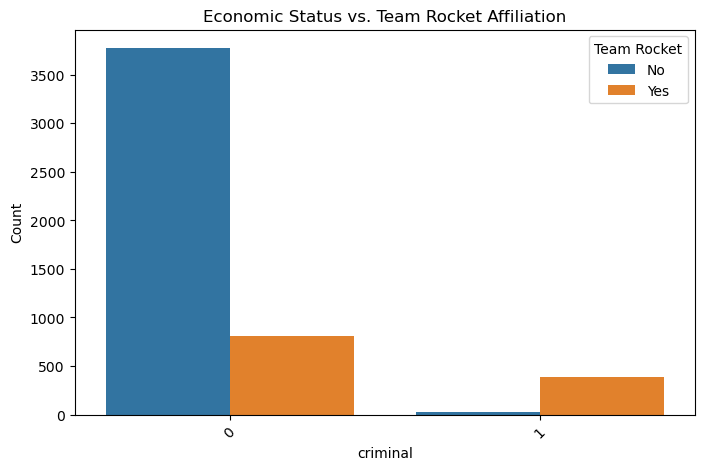

In [22]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Criminal Record', hue='Team Rocket', data=data)
plt.title('Economic Status vs. Team Rocket Affiliation')
plt.xlabel('criminal')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# if you are in a criminal, then yopu are in team rocket. if you are in team rocket, it doesnt mean you are a criminal

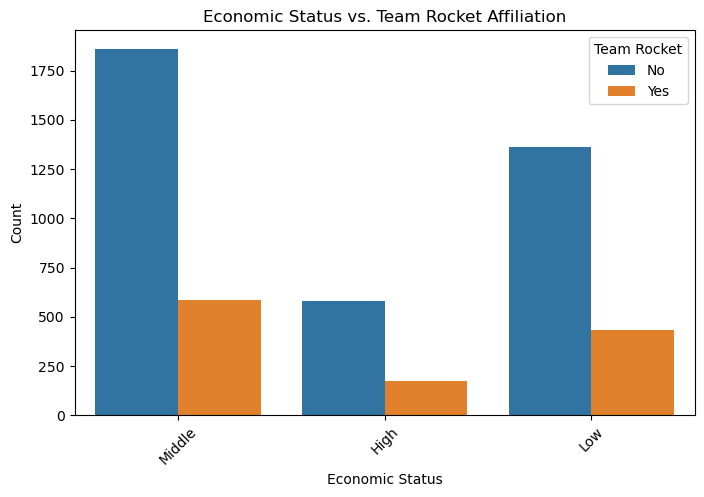

In [23]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Economic Status', hue='Team Rocket', data=data)
plt.title('Economic Status vs. Team Rocket Affiliation')
plt.xlabel('Economic Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<AxesSubplot: xlabel='Age', ylabel='Count'>

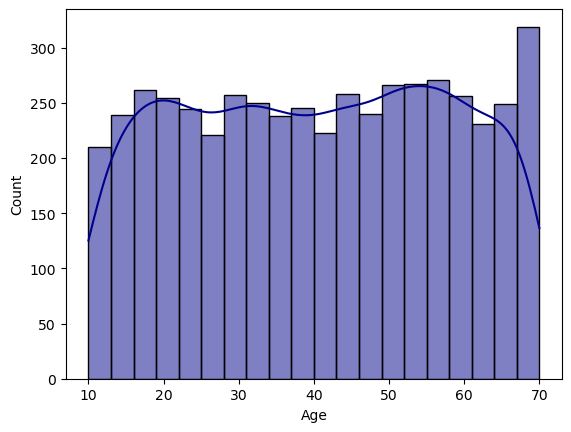

In [17]:
sns.histplot(data['Age'], bins=20, kde=True, color='darkblue')

<AxesSubplot: xlabel='Debt to Kanto', ylabel='Count'>

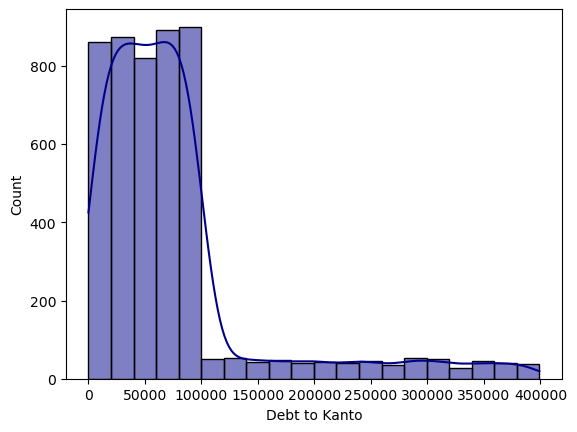

In [18]:
sns.histplot(data['Debt to Kanto'], bins=20, kde=True, color='darkblue')

<AxesSubplot: xlabel='Average Pokemon Level', ylabel='Count'>

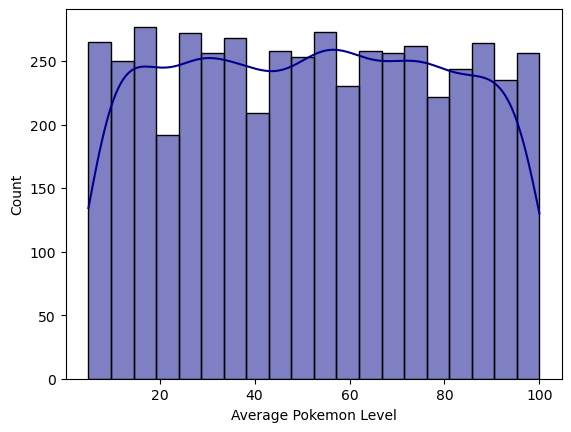

In [19]:
sns.histplot(data['Average Pokemon Level'], bins=20, kde=True, color='darkblue')